This Jupyter notebook will demonstrate a method for visually validating regression models. I developed this process because several hundred regression models were developed per analyst at my company, and analysts that are not intimately familiar with regression models often had a difficult time determining if their models were correct. Additionally, this process was automated by looping through each requested regression model, which significantly decreased the time required for model building.

I will very briefly describe the dataset and model building process, but the bulk of the information in this notebook will be devoted to examining the output visualization. The "diabetes" data from scikit-learn was used as an example dataset; at my company, this data would typically have been time-series. Two relevant columns were selected as features, along with the targets. The data was also split into training and testing using the train_test_split function from scikit-learn. Finally, a ridge regression model was created using the training data, with alpha selected using a grid-search method.

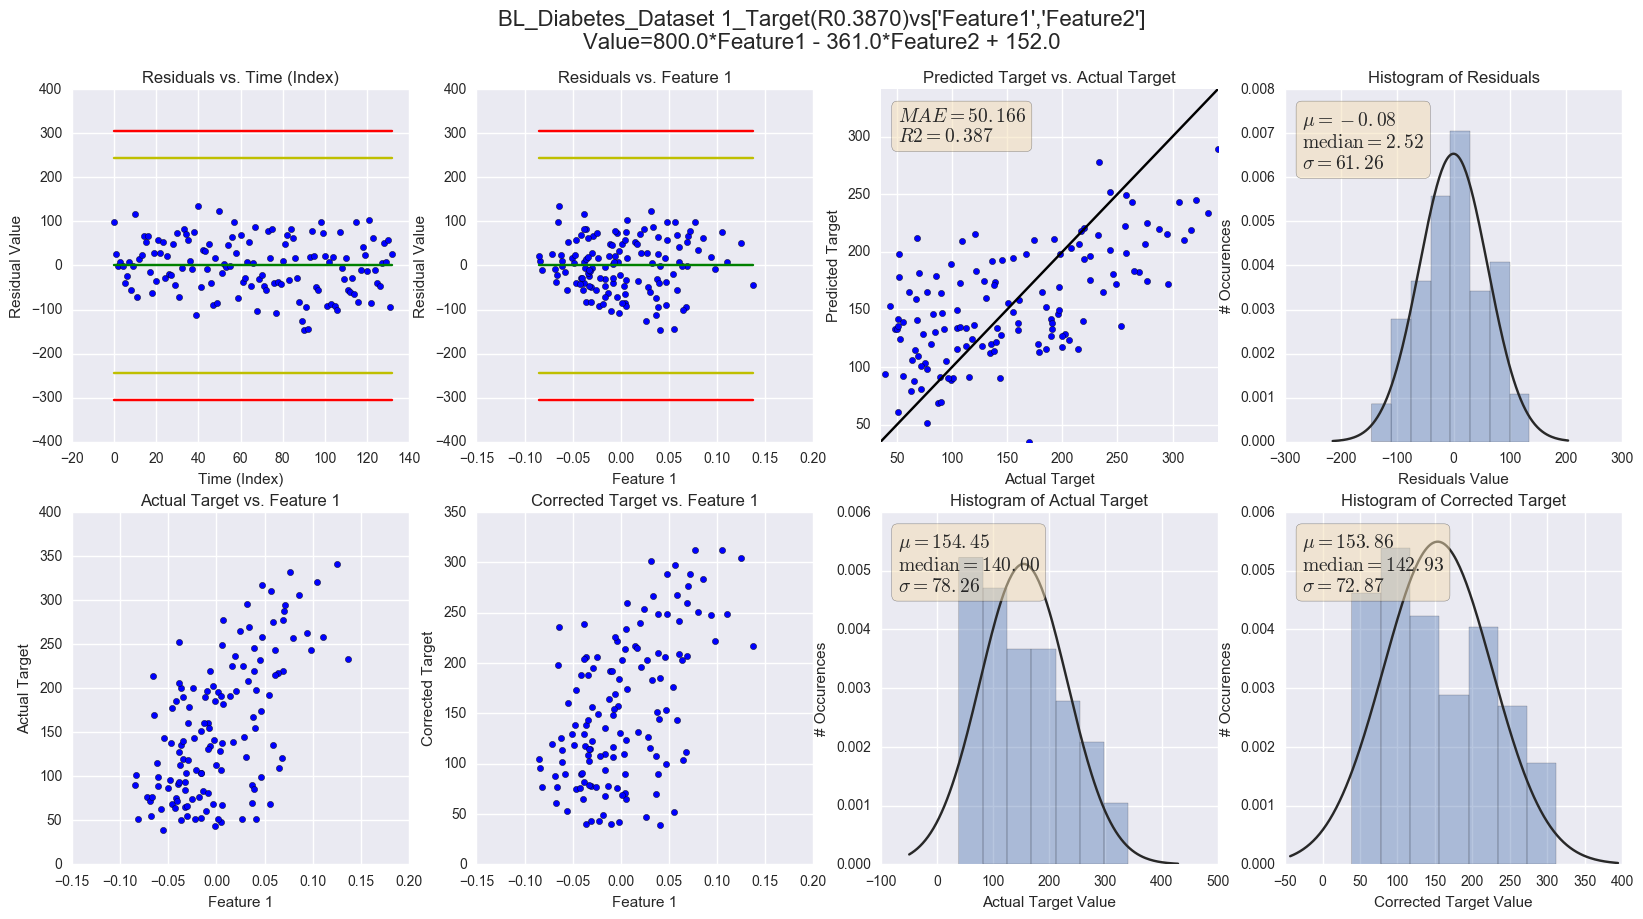

In [9]:
import pandas as pd
from sklearn import datasets
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from RegressionVisualizationClasses import createRegModel, plotRegression
%matplotlib inline
#User-adjustable parameters
rd = 3 #decimal places to round to
warn = 4 #standard deviations away that indicate a warning
alarm = 5 #standard deviations away that indicate an alarm
figSize = (20,10) #The preferred size of the output visualization
#Load the diabetes dataset and qualify it by labeling features and targets.
diabetes = datasets.load_diabetes()
df = pd.DataFrame(data=diabetes["data"][:,[2,6]],columns=["Feature 1","Feature 2"])
df["Target"] = pd.DataFrame(data=diabetes["target"],columns=["Target"])
#70% training data is usually a good size, but could be adjusted as necessary
train, test = train_test_split(df, train_size = 0.7)  
#I split the model building into several steps, mainly so that I could
#log the time to complete each step and find any bottlenecks
rModel = createRegModel("Diabetes","Dataset 1","Target",["Feature 1","Feature 2"])
timeToTT = rModel.constructXYTrainTest(train,test)
timeToModel = rModel.trainModel()
timeToPredict = rModel.makePredictions()
timeToCorrect = rModel.calcCorrectedY()
timeToBuild = rModel.buildEquation(rd)
timeToMetric = rModel.calcMetrics(rd,warn,alarm)
#Finally, a class was created to build the plots
curPlot = plotRegression(rModel, "Diabetes","Dataset 1")  
timeToPlot = curPlot.buildPlots(figSize)

There are many ways to validate regression models, but I chose a few simple visual validations which were adequate enough for my purposes. For different data, additional verifications might be required. *Note- these plots were also accompanied by a spreadsheet that calculated the Variance Inflation Factor (VIF), correlation coefficient, normality tests, and other metrics. Models were validated both "visually" and "numerically".*

**Residuals vs. Index**
To validate an assumption of regression, the residuals from the model should not display any dependency based on their index. For the time-series data that I typically work with, this was especially important because time-dependency indicates that unstable training data was selected. Aside from visually, this assumption might also be validated by fitting the residuals to a linear regression model and determining a threshold for the slope.

The yellow (warning) and red (alarm) lines plotted on the graph were selected as 4 and 5 standard deviations away, respectively. If large numbers of outliers were outside these lines, that also indicated model instability and the dataset was further refined.

**Residuals vs. Feature 1**
Feature 1 was chosen to be the "primary explanatory factor". Usually, this primary feature was chosen using domain knowledge, but an alternate approach might select the feature with the highest explained variance. 

This plot was designed to detect heteroskedasticity in the primary feature. If the residuals in this plot were not stationary, the model was examined further. Ideally, all features should be tested for heteroskedasticity, but in practice, we found that only the primary feature was necessary to test for our particular dataset.

**Predicted Target vs. Actual Target**
This plot is also called a *Y-Yhat* plot. Ideally, all predictions should lie on the y=x line, plotted in black. Deviations from this line were useful to visually indicate how well the model was constructed. By building hundreds of regression models, it was possible to gain an intuition about how this plot should look, if the model was constructed correctly. The mean absolute error (MAE) and R-squared (R2) values were selected to give a brief numerical representation of the model's validity, but those two metrics should not be relied upon alone.

**Histogram of Residuals**
Another assumption of regression is that the residuals are normally distributed. In practice, we found that this was almost always the case for our models. Nonetheless, this plot allowed quick verification of normality. Several normality tests were also calculated in an accompanying spreadsheet, as mentioned above.

**Actual Target vs. Feature 1, Corrected Target vs. Feature 1, Histogram of Actual Target, Histogram of Corrected Target**
These four plots were meant to test a 2-dimensional representation of the multiple regression models. To calculate the "corrected" target value, the secondary features were subtracted from the original target value. If the secondary features were only a minor corrective factor, the histograms of the actual and corrected targets should be similar enough that the corrected target is recognizable in its original units. If so, the model was flagged for inclusion on a particular data visualization dashboard.